In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from utils import contour_plot
from functools import partial

In [111]:
S = np.array([[1, -0.5],[-0.5, 1]])
mu = np.array([1,1])

In [247]:
class NormalBivariateGibbs:
    """Gibbs sampler for a bivariate normal distribution."""

    def __init__(
        self,
        mean: np.ndarray,
        cov: np.ndarray,
        burn_in: int = 100,
        step: int = 10,
    ):
        """Initialize an instance of the class.

        Paramerters
        -----------
        mean : np.ndarray
            Array of length 2 with the mean of the distribution
        cov : np.ndarray
            2x2 symmetric postivie-definite array with the covariance of the distribution.
        burn_in : int
            The first n samples to toss.
        step : int
            The step between samples to return.
        """
        self.mean = mean
        self.cov = cov
        self.burn_in = burn_in
        self.step = step

    def conditional_sample(self, x_j: float, i: int) -> float:
        """Sample from p(x_i | x_j)."""
        j = int(not bool(i))
        m = self.mean[i] + self.cov[i, j] / self.cov[j, j] * (x_j - self.mean[j])
        s2 = self.cov[i, i] - self.cov[i, j] ** 2 / self.cov[j, j]
        return np.random.normal(loc=m, scale=s2 ** 0.5)

    def sample(self, num_samples: int) -> np.ndarray:
        num_samples = self.burn_in + self.step * num_samples
        samples = np.zeros((num_samples, 2))
        for i in range(1, num_samples):
            samples[i, 0] = self.conditional_sample(samples[i - 1, 1], 0)
            samples[i, 1] = self.conditional_sample(samples[i, 0], 1)
        return samples[self.burn_in :: self.step]

In [248]:
model = NormalBivariateGibbs(mu, S, 10, 10)

In [278]:
num_samples = 10000
samples = model.sample(num_samples)

In [293]:
center = 1
range_ = 3.5

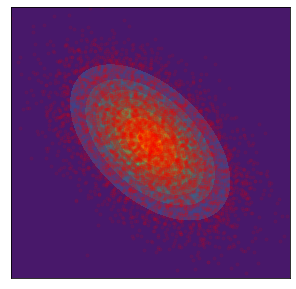

In [318]:
plt.figure(figsize=(5,5))
plt.ylim(center - range_, center + range_)
plt.xlim(center - range_, center + range_)
plt.plot(*samples.T, "r.", alpha=0.07)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
contour_plot(
    [partial(stats.multivariate_normal.pdf, mean=mu, cov=S)],
    plt.contourf,
    x_center=center,
    x_range=range_,
    y_center=center,
    y_range=range_,
);
plt.savefig("../img/gibbs/scatter.png", dpi=400)

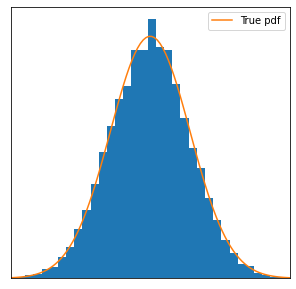

In [319]:
plt.figure(figsize=(5,5))
plt.xlim(center - range_, center + range_)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

_, bins, *_ = plt.hist(samples[:,0], bins=40);
x = np.linspace(center - range_, center + range_, 100)
delta = bins[1] - bins[0]
plt.plot(x, delta * num_samples * stats.norm.pdf(x, 1, 1), label="True pdf");
plt.legend()
plt.savefig("../img/gibbs/x1-hist", dpi=400)

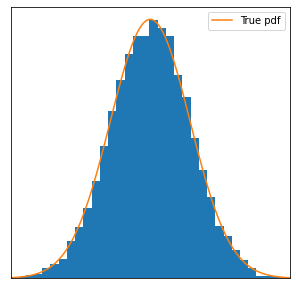

In [320]:
plt.figure(figsize=(5,5))
plt.xlim(center - range_, center + range_)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

_, bins, *_ = plt.hist(samples[:,1], bins=40);
x = np.linspace(center - range_, center + range_, 100)

delta = bins[1] - bins[0]
plt.plot(x, delta * num_samples * stats.norm.pdf(x, 1, 1), label="True pdf");
plt.legend()
plt.savefig("../img/gibbs/x2-hist", dpi=400)

In [253]:
(samples - 1).T @ (samples  - 1) / 1000

array([[ 1.03105491, -0.50856624],
       [-0.50856624,  1.00348888]])

6.95551344e-05